## Python Packages

In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 100)

## Acquire the data

In [3]:
SKdf=pd.read_csv('SalesKaggle3.csv') 

In [4]:
SKdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
Order               198917 non-null int64
File_Type           198917 non-null object
SKU_number          198917 non-null int64
SoldFlag            75996 non-null float64
SoldCount           75996 non-null float64
MarketingType       198917 non-null object
ReleaseNumber       198917 non-null int64
New_Release_Flag    198917 non-null int64
StrengthFactor      198917 non-null float64
PriceReg            198917 non-null float64
ReleaseYear         198917 non-null int64
ItemCount           198917 non-null int64
LowUserPrice        198917 non-null float64
LowNetPrice         198917 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [11]:
SKdf.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [6]:
SKdf.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [21]:
print(SKdf.File_Type.value_counts())
print(SKdf.SoldFlag.value_counts())
print ('ratio of NaN in the SoldFlag')
print(SKdf.SoldFlag.isnull().mean())

Active        122921
Historical     75996
Name: File_Type, dtype: int64
0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64
ratio of NaN in the SoldFlag
0.617951205779


### select the rows with the effective values of SoldFlag

#### This is also the historical data

In [17]:
SKdf2=SKdf[SKdf.SoldFlag.notnull()]
#SKdf2=SKdf.loc[SKdf.SoldFlag.notnull()]
SKdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
Order               75996 non-null int64
File_Type           75996 non-null object
SKU_number          75996 non-null int64
SoldFlag            75996 non-null float64
SoldCount           75996 non-null float64
MarketingType       75996 non-null object
ReleaseNumber       75996 non-null int64
New_Release_Flag    75996 non-null int64
StrengthFactor      75996 non-null float64
PriceReg            75996 non-null float64
ReleaseYear         75996 non-null int64
ItemCount           75996 non-null int64
LowUserPrice        75996 non-null float64
LowNetPrice         75996 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB


## Exploratory data analysis

SKU_number: This is the unique identifier for each product.

Order: Just a sequential counter. Can be ignored.

SoldFlag: 1 = sold in past 6 mos. 0 = Not sold

MarketingType = Two categories of how we market the product. This should probably be ignored, or better yet, each type should be considered independently.

New_Release_Flag = Any product that has had a future release (i.e., Release Number > 1)

In [19]:
print(SKdf2.columns.values)

['Order' 'File_Type' 'SKU_number' 'SoldFlag' 'SoldCount' 'MarketingType'
 'ReleaseNumber' 'New_Release_Flag' 'StrengthFactor' 'PriceReg'
 'ReleaseYear' 'ItemCount' 'LowUserPrice' 'LowNetPrice']


In [22]:
print(SKdf2.File_Type.value_counts())
print(SKdf2.MarketingType.value_counts())

Historical    75996
Name: File_Type, dtype: int64
S    40877
D    35119
Name: MarketingType, dtype: int64


#### 1. Scatter plot

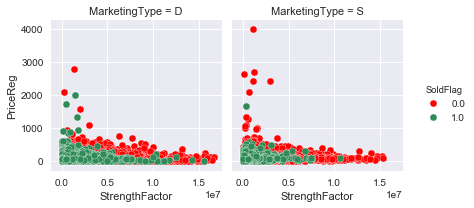

In [23]:
g = sns.FacetGrid(SKdf2, hue="SoldFlag", col="MarketingType", margin_titles=True, palette={1:"seagreen", 0:"red"})
g=g.map(plt.scatter, "StrengthFactor", "PriceReg", edgecolor="w").add_legend();

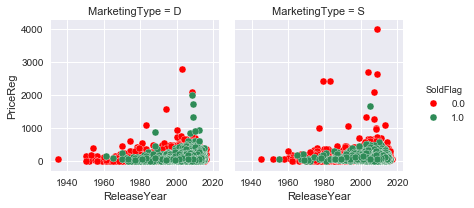

In [24]:
g = sns.FacetGrid(SKdf2, hue="SoldFlag", col="MarketingType", margin_titles=True, palette={1:"seagreen", 0:"red"})
g=g.map(plt.scatter, "ReleaseYear", "PriceReg", edgecolor="w").add_legend();

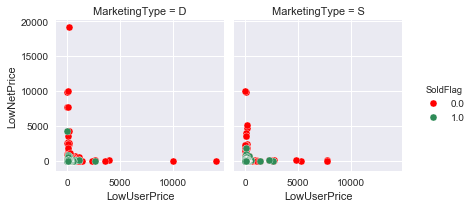

In [25]:
g = sns.FacetGrid(SKdf2, hue="SoldFlag", col="MarketingType", margin_titles=True, palette={1:"seagreen", 0:"red"})
g=g.map(plt.scatter, "LowUserPrice", "LowNetPrice", edgecolor="w").add_legend();